In [16]:
from sklearn import datasets
import pandas as pd
import numpy as np

In [17]:
iris = datasets.load_iris()
print(iris.keys())

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])


In [18]:
X = iris.data
y = iris.target

# for viewing what's inside X (iris.data)
df = pd.DataFrame(X, columns=iris.feature_names)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [19]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=21, stratify=y)
knn = KNeighborsClassifier(n_neighbors=8)
knn.fit(X_train, y_train)   #   X_train = Question, y_train = Answer

KNeighborsClassifier(n_neighbors=8)

<h3>Predicting on unlabeled data</h3>

In [20]:
knn.predict(X_test)     #   X_test = exam question given, predicting answers

array([2, 1, 2, 2, 1, 0, 1, 0, 0, 1, 0, 2, 0, 2, 2, 0, 0, 0, 1, 0, 2, 2,
       2, 0, 1, 1, 1, 0, 0, 1, 2, 2, 0, 0, 1, 2, 2, 1, 1, 2, 1, 1, 0, 2,
       1])

<h3>Checking Score on Prediction</h3>

In [21]:
knn.score(X_test, y_test)   #   y_test = exam question's actual answers, here we are remarking the student's prediction answers

0.9555555555555556

<h3>Overfitting / Underfitting via Plot</h3>

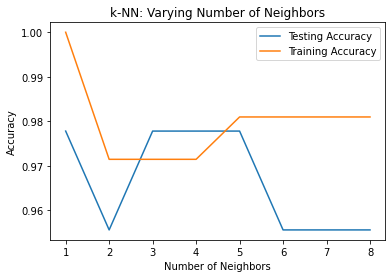

In [22]:
import matplotlib.pyplot as plt


# Setup arrays to store train and test accuracies
neighbors = np.arange(1, 9)
train_accuracy = np.zeros(len(neighbors))
test_accuracy = np.empty(len(neighbors))

# Loop over different values of k
for i, k in enumerate(neighbors, 0):
    # Set up a k-NN Classifier with k neighbors: knn
    knn = KNeighborsClassifier(n_neighbors = k)

    # Fit the classifier to the training data
    knn.fit(X_train, y_train)

    #Compute accuracy on the training set
    train_accuracy[i] = knn.score(X_train, y_train)

    #Compute accuracy on the testing set
    test_accuracy[i] = knn.score(X_test, y_test)

# Generate plot
plt.title('k-NN: Varying Number of Neighbors')
plt.plot(neighbors, test_accuracy, label = 'Testing Accuracy')
plt.plot(neighbors, train_accuracy, label = 'Training Accuracy')
plt.legend()
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.show()

<h3>Some previous basic level codes</h3>

In [23]:
X_new = np.array(
    [[5.6, 2.8, 3.9, 1.1],
     [5.7, 2.6, 3.8, 1.3],
     [4.7, 3.2, 1.3, 0.2]]
)

prediction = knn.predict(X_new)
prediction

array([1, 1, 0])

In [24]:
a = np.empty((5,5))
a

array([[ 7.35952325e+223, -1.27239642e-310,  0.00000000e+000,
         0.00000000e+000,  0.00000000e+000],
       [ 0.00000000e+000,  0.00000000e+000,  0.00000000e+000,
         7.48606332e-114, -1.32480973e-310],
       [ 6.10581256e+247,  5.30381409e+180,  2.03248280e+174,
         4.96820071e+180,  3.07931199e+175],
       [ 2.16387967e+132,  9.78354726e+199, -1.38231578e-310,
         8.76281949e-153,  7.35874691e+223],
       [ 2.06752737e+161,  2.42766817e-154,  1.45913931e-152,
         6.67135870e+151,  5.29364406e+180]])